In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load datasets
user_details = pd.read_excel(r"C:\Users\Balamanikanta\Downloads\Assignment.xlsx")
user_details


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [27]:
# Load datasets from Excel file
file_path = r"C:\Users\Balamanikanta\Downloads\Assignment.xlsx"
user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")
user_details,cooking_sessions,order_details

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
 6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
 7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
 8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
 9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1 

In [29]:
# Data Cleaning
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [31]:
# Fill or drop missing values as appropriate
order_details["Rating"] = order_details["Rating"].fillna(0)  # Replace NaN ratings with 0

# Check for duplicates
print(user_details.duplicated().sum())
print(cooking_sessions.duplicated().sum())
print(order_details.duplicated().sum())


0
0
0


In [35]:
# Merging datasets
merged_data = pd.merge(order_details, cooking_sessions, on=["Session ID", "User ID"], how="left")
merged_data = pd.merge(merged_data, user_details, on="User ID", how="left")
merged_data

,Order ID,User ID,Order Date,Meal Type_x,Dish Name_x,Order Status,Amount (USD),Time of Day,Rating,Session ID,...,Duration (mins),Session Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,...,30,4.5,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002,...,20,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,0.0,S003,...,40,4.8,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004,...,30,4.2,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005,...,15,4.7,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006,...,30,4.3,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007,...,45,4.6,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,0.0,S008,...,20,4.4,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009,...,40,4.9,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010,...,10,4.1,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [57]:
column_names = merged_data.columns
print(column_names)

Index(['Order ID', 'User ID', 'Order Date', 'Meal Type_x', 'Dish Name_x',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID',
       'Dish Name_y', 'Meal Type_y', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders',
       'Age Group'],
      dtype='object')


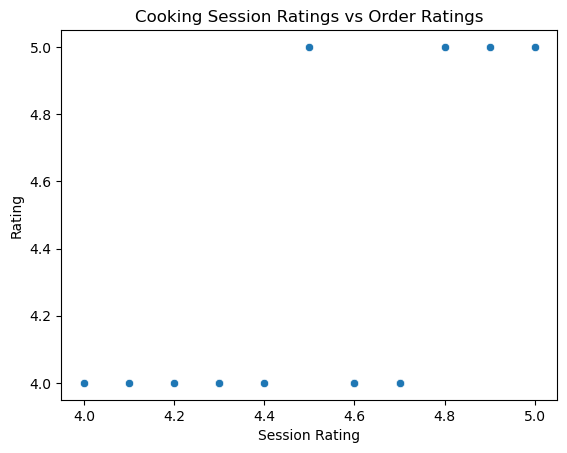

In [37]:
# Analysis
# Relationship between cooking session ratings and order completion
completed_orders = merged_data[merged_data["Order Status"] == "Completed"]
sns.scatterplot(data=completed_orders, x="Session Rating", y="Rating")
plt.title("Cooking Session Ratings vs Order Ratings")
plt.show()


In [51]:
# Popular dishes by frequency of orders
dish_popularity = merged_data["Dish Name_x"].value_counts().head(5)
print("Most popular dishes:")
print(dish_popularity)

Most popular dishes:
Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


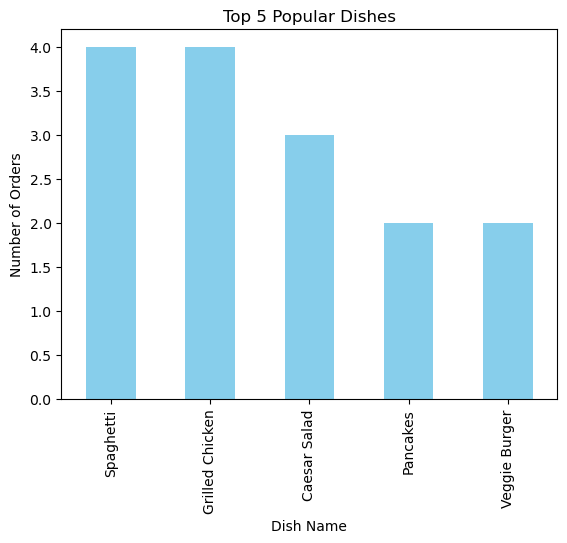

In [53]:
# Visualize dish popularity
dish_popularity.plot(kind="bar", color="skyblue")
plt.title("Top 5 Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.show()

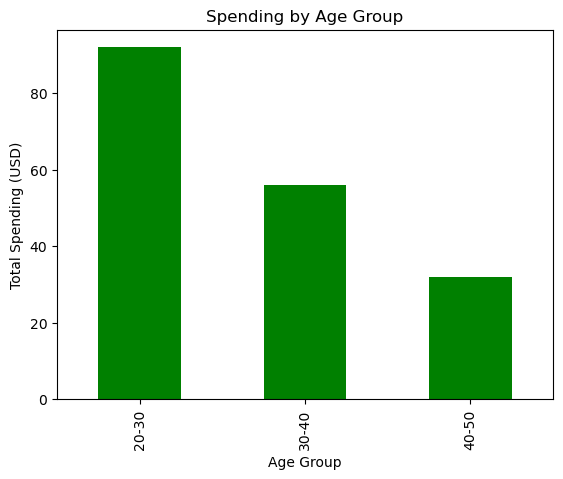

In [61]:
# Demographic influences on behavior
# Spending by age group
merged_data["Age Group"] = pd.cut(merged_data["Age"], bins=[20, 30, 40, 50], labels=["20-30", "30-40", "40-50"])
age_spending = merged_data.groupby("Age Group", observed=False)["Amount (USD)"].sum()

# Visualize spending by age group
age_spending.plot(kind="bar", color="green")
plt.title("Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spending (USD)")
plt.show()

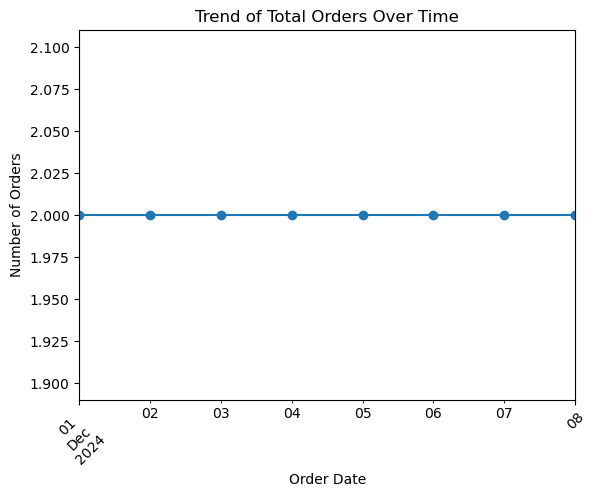

In [65]:
# Business Recommendations
# Trend of orders over time
order_trend = merged_data.groupby("Order Date").size()
order_trend.plot(kind="line", marker="o")
plt.title("Trend of Total Orders Over Time")
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

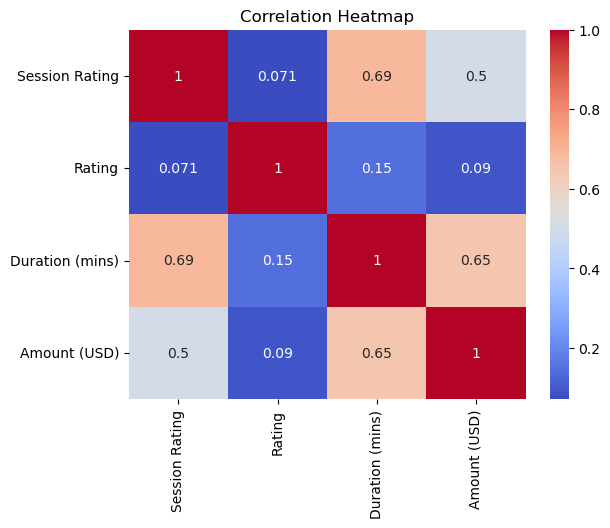

In [67]:
# Heatmap of correlations between numeric variables
correlation_matrix = merged_data[["Session Rating", "Rating", "Duration (mins)", "Amount (USD)"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [71]:
# Save cleaned data and insights
merged_data.to_csv("CleanedData.csv", index=False)

In [73]:
# Final Note
print("Analysis complete. Key insights saved to CleanedData.csv.")

Analysis complete. Key insights saved to CleanedData.csv.


In [79]:
from IPython.display import FileLink

# Create a downloadable link for the CSV file
FileLink(r'CleanedData.csv')


C:\Users\Balamanikanta\CleanedData.csv